**Regression** is one of the supervised learning methods in machine learning. Given a training set of data containing observations and their associated continuous outputs, the goal of regression is to explore the relationships between the observations (also called features) and the targets, and to output a continuous value based on the input features of an unknown
sample [1].


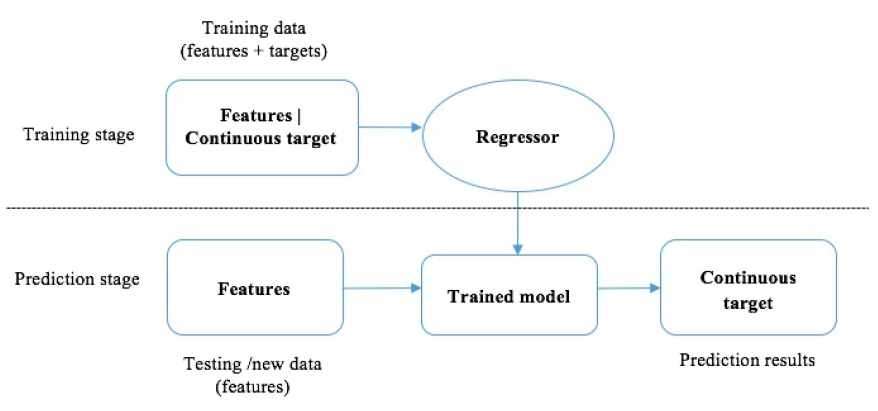

**Linear regression** explores the linear relationship between observations and targets and the relationship is represented in a linear equation or weighted sum function. Given a data sample
    *x* with *n* features $x_{1}$, $x_{2}$, ..., $x_{n}$(*x* represents a feature vector and *x = ($x_{1}$, $x_{1}$, ...,$x_{1}$)*), and **weights** (also called **coefficients**) of the linear regression model *w* (*w* represents a vector ($w_{1}$, $w_{2}$, ..., $w_{n}$)), the target *y* is expressed as follows: 
    
   *y = $w_{1}$ $x_{1}$ + $w_{2}$ $x_{2}$ + ... + $w_{n}$ $x_{n}$ =  $w^{T}x$*
   
Or sometimes, the linear regression model comes with an **intercept** (also called **bias**) $w_{0}$, the preceding linear relationship becomes as follows:

   *y = $w_{0}$ + $w_{1}$ $x_{1}$ + $w_{2}$ $x_{2}$ + ... + $w_{n}$ $x_{n}$ =  $w^{T}x$*


A linear regression model, or specifically, its weight vector *w* is learned from the training data, with the goal of minimizing the estimation error defined as **mean squared error (MSE)**, which measures the average of squares of difference between the truth and prediction. Give *m* training
samples,

($x^{1}$,$y^{1}$), ($x^{2}$,$y^{2}$),.., ($x^{i}$,$y^{i}$),..., ($x^{m}$,$y^{m}$)

the cost function *J(w)* regarding the weights to be optimized is expressed as follows:

$$J(w) = \frac{1}{m}\sum \limits _{i=1} ^ {m} \frac{1}{2}(\hat{y}(x^{i})-y^{i})^{2}$$
where

$\hat{y}(x^{(i)})= w^{T}x^{(i)}$


In this assignment, you are supposed to create a linear regression model from scratch **without using the scikit learn library for modeling**.  You are given a dataset consisting of actual car advertisements belonging to 2020. You will use the model to predict the values of "**Fiyat**". Since this is raw data, you need to prepare your data using preprocessing methods such as encoding the categorical data, feature scaling (standardization/normalization) etc. before creating linear regression modeling. 

You are given train data ( observations with labels) and test data (observations without labels). You will perform a regression task by using training data. Before your modeling, you can apply the feature selection method. Thus you do not have to use all features. Split the given train data into your own training and testing set, with a 0.8-0.2 ratio (training set will be %80, and the test set will be %20 of the dataset). Evaluate your **training MSEs** by **plotting** and create a table for your **test MSEs**. Implementation of your model will consist of multiple different parts that influence the total performance. Therefore, it is very important to provide ways to measure the contribution of these parts to the overall model. In the table, you will present the results of the ablation study in your learning model. Your ablation study should include the following steps:

 - Linear regression
 - Feature space extension (using Polynomial or other kernels)
 - Regularization ( Put the results with different regularization weights in your table, as well.)
 
Finally use the given original test data for your best prediction result (predicted 'Fiyat' values), save it as csv file, and upload it to the Kaggle competition. Furthermore, you are supposed to upload your coding in Jupyter notebook to the department's submission system.

Kaggle competition: https://www.kaggle.com/t/acbad5aee9684d45b1a5a564c6bdfb24

[1]: Yuxi (Hayde) Lui, Python Machine Learning by Example, 2020

In [2]:
#import necessary libraries here

import re
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Code here for data loading (You can enlarge the cell as much as you want.)

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_n = len(train_df)


### Data preprocessing

In [4]:
# Code here for data preprocessing (You can enlarge the cell as much as you want.)
# You can apply feature selection to reduce the input variable to your model
# by using only relevant data and getting rid of noise in data. 
# You can consider coefficients to have an idea about feature importance.

test_df["Fiyat"] = None

df = pd.concat([train_df, test_df])

# Feature Selection
df.drop("Ilan Basligi", axis=1, inplace=True)
df.drop("Id", axis=1, inplace=True)
df.drop("Renk", axis=1, inplace=True)
df.drop("Il / Ilce", axis=1, inplace=True)

# Preprocessing numerical data
df["Fiyat"] = df["Fiyat"].str.replace(" TL", "").str.replace(
    r".", "").str.replace(r",", ".").astype(float)

df["Ilan Tarihi"] = df["Ilan Tarihi"].astype(str).map(
    lambda x: re.sub(".*\n  ", "", x)).astype(int)

# Preprocessing categorical data
df["Ilan Tarihi"] = df["Ilan Tarihi"].apply(lambda x: 1 if x == 2020 else 0)

seri_list = df["Seri"].value_counts()[:40].index.tolist()
df["Seri"] = df["Seri"].apply(lambda x: x if x in seri_list else "Rare")

model_list = df["Model"].value_counts()[:155].index.tolist()
df["Model"] = df["Model"].apply(lambda x: x if x in model_list else "Rare")

df = pd.get_dummies(df, columns=["Seri", "Model"])

cols = df.columns.tolist()
cols = cols[4:] + cols[:4]
df = df[cols]

# Preprocessing targets
df["Fiyat"] = np.log10(df["Fiyat"])

train_df = df[:train_n]
test_df = df[train_n:]

C:\Users\usr\AppData\Local\Temp\ipykernel_18392\2291915643.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Fiyat"] = df["Fiyat"].str.replace(" TL", "").str.replace(


In [5]:
# Split dataset into train and test datasets
df_train = train_df.sample(frac=0.8)
df_test = train_df.drop(df_train.index)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Split features and target
x_train, y_train = df_train[cols[:-1]].values, df_train[cols[-1:]].values
x_test, y_test = df_test[cols[:-1]].values, df_test[cols[-1:]].values

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Warning: Do not use scikit learn library for regression implementation 

In [6]:
# Code here for Regression implementation (You can enlarge the cell as much as you want.)
# Do not use scikit learn library for implementation 

class LinearRegressor:
    def __init__(self, name = ""):
        self.name = name
        
    def mean_square_err_fn(self, y_hat, y, lambda_ = 0):
        return (1 / (2 * y.size)) * (np.sum(np.square(y - y_hat)) + lambda_ * np.dot(self.w, self.w))
    
    def w_der(self, y_hat, y, x, lambda_ = 0):
        return (1 / y.size) * (np.sum(np.einsum('ij,i->ij', x, y_hat - y), axis = 0) + lambda_ * self.w)
    
    def linear_basis_fn(self, x):
        return x
    
    def polynomial_basis_fn(self, x):
        return x ** np.mgrid[0:x.shape[1]]
    
    def gaussian_basis_fn(self, x, s = 1):
        mu = np.linspace(0, 1, x.shape[1])
        return np.exp(-(x - mu)**2 / (2 * s**2))
    
    def sigmoidal_basis_fn(self, x, s = 1):
        mu = np.linspace(0, 1, x.shape[1])
        return 1 / (1 + np.exp((x - mu) / s))
    
    def train(self, x: np.ndarray, y: np.ndarray, epochs: int, learning_rate: float = 1e-3, validation_data: tuple = None, basis_fn: int = 0, lambda_: int = 0) -> None:
        """
        Args:
            x (np.ndarray): Feature matrix
            y (np.ndarray): Target vector
            epochs (int): Number of epochs
            learning_rate (float, optional): Defaults to 1e-3.
            validation_data (tuple, optional): Validation data, (x_val, y_val). Defaults to None.
            basis_fn (int, optional): Basis function code. Defaults to 0.
            -> 0: Linear
            -> 1: Polynomial
            -> 2: Gaussian
            -> 3: Sigmoidal
            lambda_ (int, optional): Lambda value for L2 regularization. Defaults to 0.
        """
        x = np.c_[np.ones(x.shape[0]), x]
        y = np.squeeze(y)
        self.w = np.random.rand(x.shape[1], )
        self.res = dict()
        self.res["loss"] = list()
        self.res["val_loss"] = list()
        
        if(basis_fn == 0):
            self.basis_fn = self.linear_basis_fn
        elif (basis_fn == 1):
            self.basis_fn = self.polynomial_basis_fn
        elif (basis_fn == 2):
            self.basis_fn = self.gaussian_basis_fn
        elif (basis_fn == 3):
            self.basis_fn = self.sigmoidal_basis_fn
        else:
            print("[ERROR] Unknown / Not Implemented Basis Function")
            print("Switching to linear basis function")
            self.basis_fn = self.linear_basis_fn
        
        
        if validation_data is not None:
            val_x = validation_data[0]
            val_x = np.c_[np.ones(val_x.shape[0]), val_x]
            val_y = validation_data[1]
            val_y = np.squeeze(val_y)
        
        for epoch in range(epochs):
            y_hat = np.dot(self.basis_fn(x), self.w)
            
            loss = self.mean_square_err_fn(y_hat, y, lambda_)
            self.res["loss"].append(loss)
            
            if validation_data is not None:
                self.eval(val_x, val_y, isTraining = True)
                
            self.w -= learning_rate * self.w_der(y_hat, y, self.basis_fn(x), lambda_)
            
        print(f"Training Loss:\t\t{self.res['loss'][-1]}")
        if validation_data is not None:
            print(f"Validation Loss:\t{self.res['val_loss'][-1]}")
    
    def eval(self, x, y, isTraining = False):
        y_hat = np.dot(self.basis_fn(x), self.w)
        loss = self.mean_square_err_fn(y_hat, y)
        if isTraining:
            self.res["val_loss"].append(loss)
        return loss
    
    def predict(self, x):
        x = np.c_[np.ones(x.shape[0]), x]
        return np.dot(self.basis_fn(x), self.w)


Training Loss:		2.5257418343262836
Validation Loss:	2.493925449605028
Training Loss:		0.3261580187830624
Validation Loss:	0.31908054367411715
Training Loss:		0.1242709155438792
Validation Loss:	0.12489248078861606


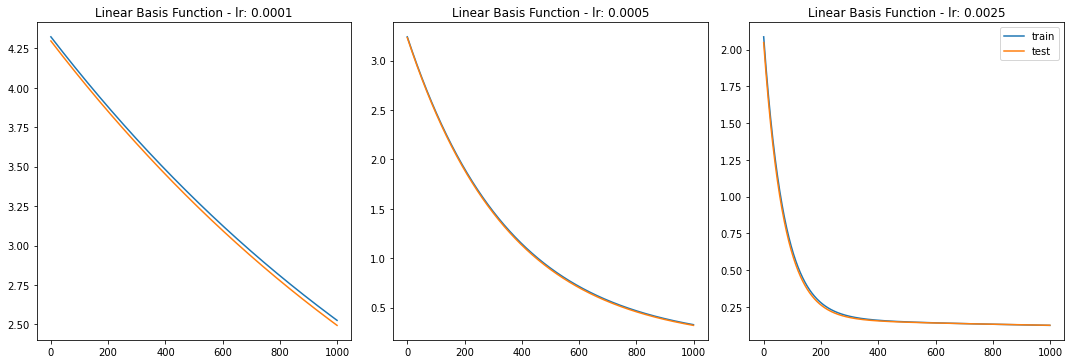

In [6]:
# Tests for regression with linear basis function

lr = [1e-4, 5e-4, 25e-4]

fig, ax = plt.subplots(1, 3, figsize= (15, 5))
fig.tight_layout()
i = 0
for learning_rate in lr:
    regressor = LinearRegressor("Linear Basis Function - lr: " + str(learning_rate))
    regressor.train(x_train, y_train, 1000, learning_rate, (x_test, y_test), 0)
    ax[i].plot(regressor.res['loss'])
    ax[i].plot(regressor.res['val_loss'])
    ax[i].set_title(regressor.name)
    i +=1
    
plt.legend(['train', 'test'])

Training Loss:		2.984762708837465
Validation Loss:	2.93105246106279
Training Loss:		0.46181865703287234
Validation Loss:	0.4491454958386194
Training Loss:		0.19283008709696298
Validation Loss:	0.1852654933591889


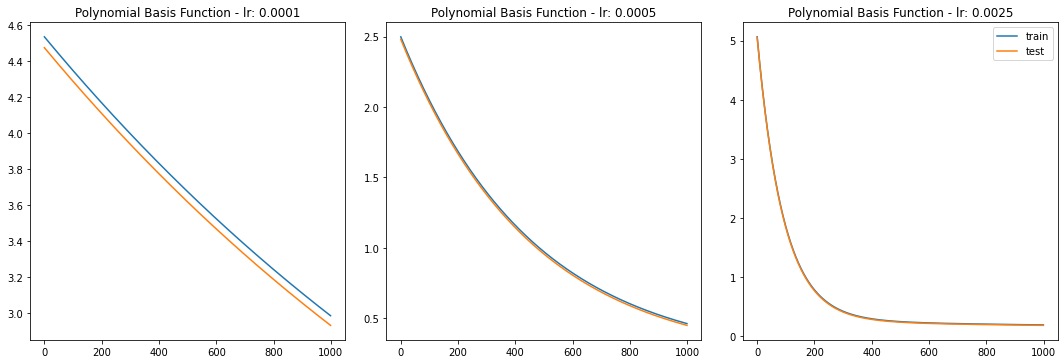

In [7]:
# Tests for regression with polynomial basis function

lr = [1e-4, 5e-4, 25e-4]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout()
i = 0
for learning_rate in lr:
    regressor = LinearRegressor("Polynomial Basis Function - lr: " + str(learning_rate))
    regressor.train(x_train, y_train, 1000, learning_rate, (x_test, y_test), 1)
    ax[i].plot(regressor.res['loss'])
    ax[i].plot(regressor.res['val_loss'])
    ax[i].set_title(regressor.name)
    i += 1

plt.legend(['train', 'test'])


Training Loss:		0.08276572526838397
Validation Loss:	0.08117452585778981
Training Loss:		0.06529880184298911
Validation Loss:	0.06491705755246424
Training Loss:		1.5848213645419083
Validation Loss:	1.590177727994005


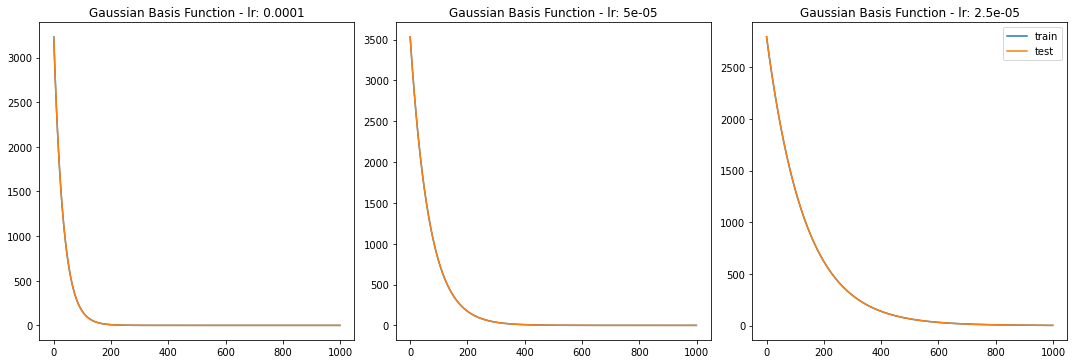

In [7]:
# Tests for regression with gaussian basis function

lr = [1e-4, 5e-5, 25e-6]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout()
i = 0
for learning_rate in lr:
    regressor = LinearRegressor("Gaussian Basis Function - lr: " + str(learning_rate))
    regressor.train(x_train, y_train, 1000,
                    learning_rate, (x_test, y_test), 2)
    ax[i].plot(regressor.res['loss'])
    ax[i].plot(regressor.res['val_loss'])
    ax[i].set_title(regressor.name)
    i += 1

plt.legend(['train', 'test'])

Training Loss:		0.06076165212713754
Validation Loss:	0.05798136153717417
Training Loss:		0.7945544129663114
Validation Loss:	0.7977439847485568
Training Loss:		37.596385530708105
Validation Loss:	37.73981527689445


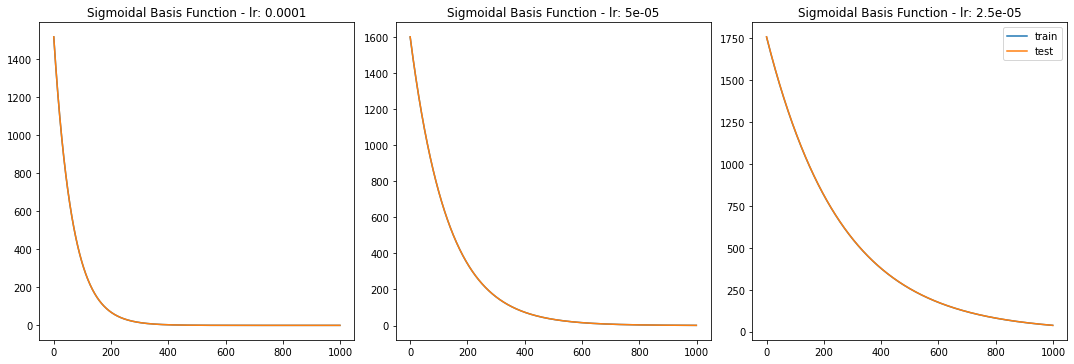

In [9]:
# Tests for regression with sigmoidal basis function

lr = [1e-4, 5e-5, 25e-6]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout()
i = 0
for learning_rate in lr:
    regressor = LinearRegressor("Sigmoidal Basis Function - lr: " + str(learning_rate))
    regressor.train(x_train, y_train, 1000,
                    learning_rate, (x_test, y_test), 3)
    ax[i].plot(regressor.res['loss'])
    ax[i].plot(regressor.res['val_loss'])
    ax[i].set_title(regressor.name)
    i += 1

plt.legend(['train', 'test'])

Training Loss:		0.0655998763117948
Validation Loss:	0.0652459930696482
Training Loss:		0.0658770617695831
Validation Loss:	0.06446822864705141
Training Loss:		0.08106471900360211
Validation Loss:	0.08023856529778713


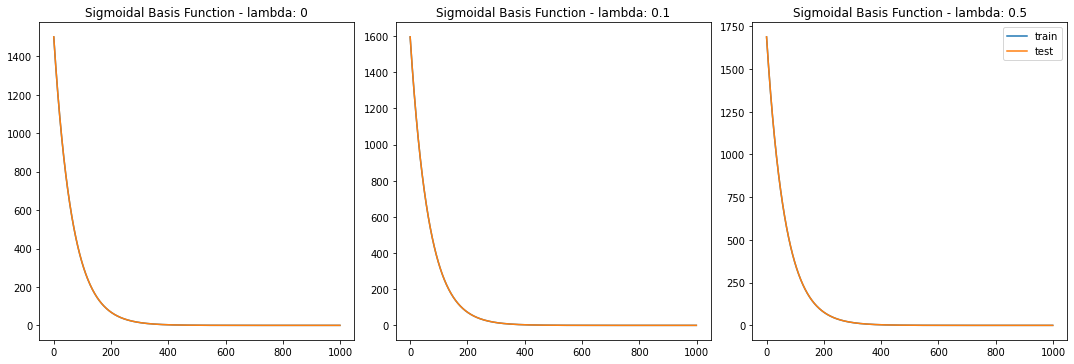

In [16]:
# Best model among previously trained models chosen to be tested with regularization

lr = 1e-4
lambdas = [0, 0.1, 0.5]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout()
i = 0
for lambda_ in lambdas:
    regressor = LinearRegressor("Sigmoidal Basis Function - lambda: " + str(lambda_))
    regressor.train(x_train, y_train, 1000,
                    lr, (x_test, y_test), 3, lambda_)
    ax[i].plot(regressor.res['loss'])
    ax[i].plot(regressor.res['val_loss'])
    ax[i].set_title(regressor.name)
    i += 1

plt.legend(['train', 'test'])


In [11]:
# Prediction Code For test.csv
# Best model with lowest loss chosen for prediction
# Note that model first re-trained with previous hyper-parameters
# Since weights was not saved during experimenting

LEARNING_RATE = 1e-4
BASIS_FN = 3
EPOCH_NUM = 1000

regressor = LinearRegressor()
regressor.train(x_train, y_train, EPOCH_NUM, LEARNING_RATE, basis_fn=BASIS_FN)

Training Loss:		0.06334443942063374


In [31]:
x = test_df[cols[:-1]].values
x = scaler.fit_transform(x)
y = regressor.predict(x)
labels = np.power(10, y) # .round(-3)

In [32]:
result_df = pd.read_csv('test.csv')
result_df.drop(["Seri" , "Model" , "Ilan Basligi" , "Yil" , "KM" , "Renk" , "Ilan Tarihi" , "Il / Ilce"], axis=1, inplace=True)
result_df["Fiyat"] = labels.astype(int)
result_df["Fiyat"] = result_df["Fiyat"].apply(lambda x: f"{x:,}")
result_df.to_csv('result.csv', index=False)